在Anaconda/conda下安装py2.7并实现和3.7的共存：
conda create -n python27 python=2.7 anaconda
转换到2.7版本：
activate python27
转换回3.7版本（默认，base）：
deactivate python27
或手动在anaconda中切换环境，再launch jupyter notebook

In [1]:
from PIL import Image
pil_im = Image.open('./image/W2/cyberpunk.jpg') #这里文件名居然不区分大小写
#大概是py的系统文件不支持区分大小写，我尝试在该目录下创建一个同名小写文件也失败了
pil_im.show()
#每次运行得到的文件名也都是不同的，都以tmp开头，大概是在某个内存地址上

![Keanu Reeves](./image/W2/Run1.png)

In [13]:
pil_im = Image.open('./image/W2/cyberpunk.jpg').convert('L') #查了一下tutorial貌似没提到其他模式
pil_im.show()

![Keanu Reeves](./image/W2/Run2.png)

In [18]:
from PIL import Image
import os

for infile in filelist:
    outfile = os.path.splitext(infile)[0] + ".jpg"
    if infile != outfile:
        try:
            Image.open(infile).save(outfile)
        except IOError:
            print "cannot convert", infile

#NameError: name 'filelist' is not defined 先搁置此问题往下学

NameError: name 'filelist' is not defined

In [3]:
pil_im.thumbnail((2048, 2048)) #这里先输入2048,2048也会输出最长边为2048的缩略图，但如果再从128变回2048就不行了，很奇怪。
#必须重启服务之后才行，大概是有缓存？
#另外如果先输入4096就会保持原大小（原大小是3840,4096更大就不能是“thumbnail”了）
pil_im.show()

![Keanu Reeves](./image/W2/Run3.png)

In [5]:
pil_im = Image.open('./image/W2/cyberpunk.jpg')
box = (100,1200,1500,2000)
region = pil_im.crop(box)
region = region.transpose(Image.ROTATE_180)
pil_im.paste(region,box)
pil_im.show()

![Keanu Reeves](./image/W2/Run4.png)

In [9]:
pil_im = Image.open('./image/W2/cyberpunk.jpg')
box = (100,1200,1500,2000)
region = pil_im.crop(box)
#region = region.transpose(Image.ROTATE_180)
#pil_im.paste(region,box)
region.show()

![Keanu Reeves](./image/W2/Region.png)

In [13]:
pil_im = Image.open('./image/W2/cyberpunk.jpg')
out = pil_im.resize((4096, 4096))
#这里resize区别于thumbnail是调整了全部尺寸，并且不锁定长宽比例，也可以把图像调到更大
out.show()
out = pil_im.rotate(45)
#这里的旋转是逆时针的，并且旋转出来是png，本没有的地方也不会自动进行填充
out.show()

![Keanu Reeves](./image/W2/resize.png)

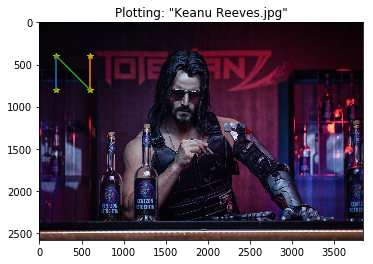

In [45]:
from PIL import Image
from pylab import *
im = array(Image.open('./image/W2/cyberpunk.jpg'))
imshow(im) #这句话的作用是显示底板图像，如果没有它，就只有下面几个点和连线了，白色底板

x = [200,200,600,600]
y = [400,800,400,800]

# 使用黄色星状标记绘制点
plot(x,y,'y*')

plot(x[:2],y[:2]) #绘制连接 前两个点 的线；0省略

plot(x[2:4], y[2:4]) #那么这里难道是和C语言一样的，外国人习惯左闭右开？
#学完P9页后发现确实是这样的√

plot((x[0], x[3]), (y[0], y[3]))#连接第一个点和第四个点
#当多条线被连接时，自动选择颜色，蓝→橙→绿→……

# 添加标题，显示绘制的图像
title('Plotting: "Keanu Reeves.jpg"')
show()

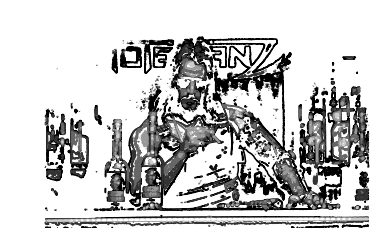

In [47]:
from PIL import Image
from pylab import *
im = array(Image.open('./image/W2/cyberpunk.jpg').convert('L'))

# 新建一个图像
figure()
# 不使用颜色信息
gray()
# 在原点的左上角显示轮廓图像
contour(im, origin='image')
axis('equal')
axis('off')
show()

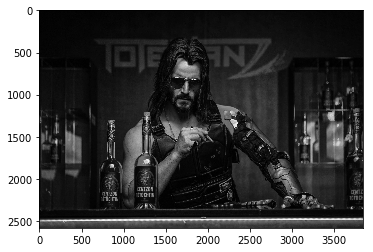

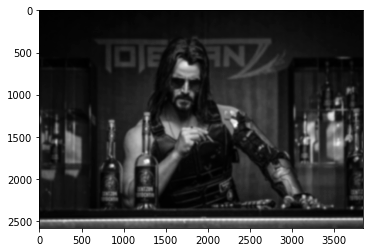

In [62]:
#高斯模糊
from PIL import Image
from numpy import *
from scipy.ndimage import filters
im = array(Image.open('./image/W2/cyberpunk.jpg').convert('L'))
im2 = filters.gaussian_filter(im,10)
imshow(im)
figure()
imshow(im2)

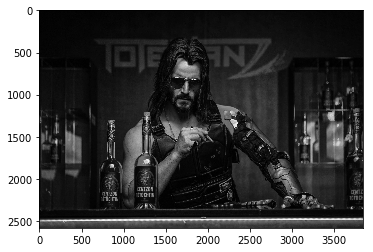

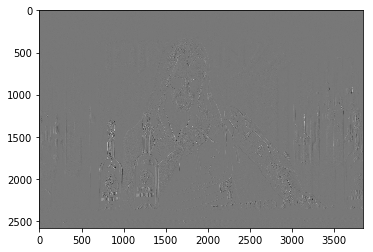

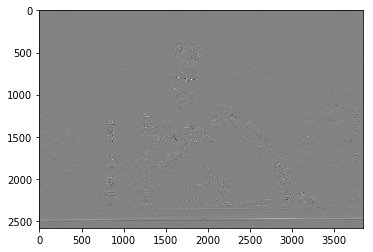

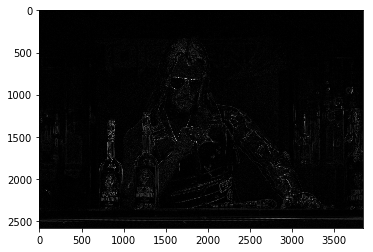

In [67]:
#Sobel滤波器
from PIL import Image
from numpy import *
from scipy.ndimage import filters

im = array(Image.open('./image/W2/cyberpunk.jpg').convert('L'))

# Sobel 导数滤波器
imx = zeros(im.shape)
filters.sobel(im,1,imx)
imy = zeros(im.shape)
filters.sobel(im,0,imy)
magnitude = sqrt(imx**2 + imy**2)

imshow(im)

figure()
imshow(imx)

figure()
imshow(imy)

figure()
imshow(magnitude)

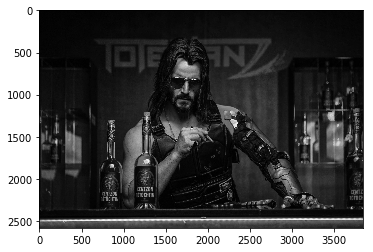

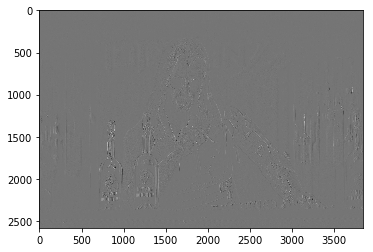

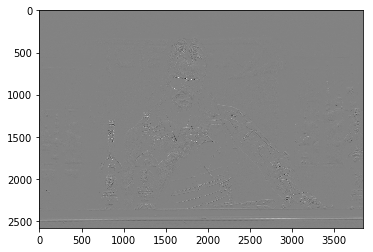

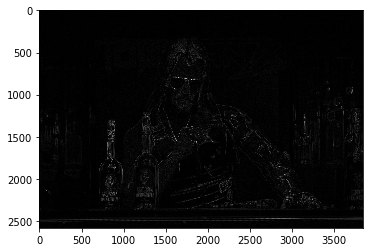

In [73]:
#让我们再来看看Prewitt滤波器表现如何（貌似都差不多）
from PIL import Image
from numpy import *
from scipy.ndimage import filters

im = array(Image.open('./image/W2/cyberpunk.jpg').convert('L'))

# Sobel 导数滤波器
imx = zeros(im.shape)
filters.prewitt(im, 1, imx)
imy = zeros(im.shape)
filters.prewitt(im, 0, imy)
magnitude = sqrt(imx ** 2 + imy ** 2) #**表示乘方

imshow(im)

figure()
imshow(imx)

figure()
imshow(imy)

figure()
imshow(magnitude)

#为啥我这个magnitude全是黑的 难道全是负导数？（还是说书上为了印刷转换为了白底）

In [68]:
#关于函数调用在jpy nb上的小测试
def function():
    print('This is a function')
    a = 1 + 2
    print(a)

function()

This is a function
3


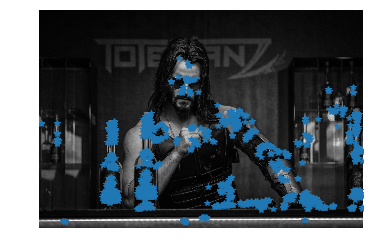

In [77]:
#Harris角点检测程序
from PIL import Image
from numpy import *
from pylab import *
from scipy.ndimage import filters

def compute_harris_response(im,sigma = 3):
#""" 在一幅灰度图像中，对每个像素计算Harris 角点检测器响应函数"""

    # 计算导数
    imx = zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)
    imy = zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (1,0), imy)

    # 计算Harris 矩阵的分量（那么为什么这两个地方都要求一个gaussian，不冲突吗）
    Wxx = filters.gaussian_filter(imx * imx, sigma)
    Wxy = filters.gaussian_filter(imx * imy, sigma)
    Wyy = filters.gaussian_filter(imy * imy, sigma)

    # 计算特征值和迹
    Wdet = Wxx * Wyy - Wxy ** 2
    Wtr = Wxx + Wyy
    return Wdet / Wtr

def get_harris_points(harrisim, min_dist = 10, threshold = 0.1):
#""" 从一幅Harris 响应图像中返回角点。min_dist 为分割角点和图像边界的最少像素数目"""
    
    # 寻找高于阈值的候选角点
    corner_threshold = harrisim.max() * threshold
    harrisim_t = (harrisim > corner_threshold) * 1
    
    # 得到候选点的坐标
    coords = array(harrisim_t.nonzero()).T
    # 以及它们的Harris 响应值
    candidate_values = [harrisim[c[0],c[1]] for c in coords]
    # 对候选点按照Harris 响应值进行排序
    index = argsort(candidate_values)
    # 将可行点的位置保存到数组中
    allowed_locations = zeros(harrisim.shape)
    allowed_locations[min_dist:-min_dist,min_dist:-min_dist] = 1
    # 按照min_distance 原则，选择最佳Harris 点
    filtered_coords = []
    for i in index:
        if allowed_locations[coords[i,0],coords[i,1]] == 1:
            filtered_coords.append(coords[i])
            allowed_locations[(coords[i,0]-min_dist):(coords[i,0]+min_dist),
            (coords[i,1]-min_dist):(coords[i,1]+min_dist)] = 0
    return filtered_coords

def plot_harris_points(image,filtered_coords):
#""" 绘制图像中检测到的角点"""
    
    figure()
    gray()
    imshow(image)
    plot([p[1] for p in filtered_coords],[p[0] for p in filtered_coords],'*')
    axis('off')
    show()

#以下内容是直接执行的，相当于并没有套用harris.py
im = array(Image.open('./image/W2/cyberpunk.jpg').convert('L'))
harrisim = compute_harris_response(im)
filtered_coords = get_harris_points(harrisim)
plot_harris_points(im, filtered_coords)

In [82]:
def get_descriptors(image,filtered_coords,wid=5):
#对于每个返回的点，返回点周围2*wid+1 个像素的值（假设选取点的min_distance > wid）

#注意，仍然是左闭右开
    desc = []
    for coords in filtered_coords:
        patch = image[coords[0] - wid : coords[0] + wid + 1,
                    coords[1] - wid : coords[1] + wid + 1].flatten()
        desc.append(patch)
    return desc

def match(desc1,desc2,threshold=0.5):
#对于第一幅图像中的每个角点描述子，使用归一化互相关，选取它在第二幅图像中的匹配角点
    
    n = len(desc1[0])
    # 点对的距离
    d = -ones((len(desc1),len(desc2)))
    for i in range(len(desc1)):
        for j in range(len(desc2)):
            d1 = (desc1[i] - mean(desc1[i])) / std(desc1[i])
            d2 = (desc2[j] - mean(desc2[j])) / std(desc2[j])
            ncc_value = sum(d1 * d2) / (n - 1)
            if ncc_value > threshold:
                d[i,j] = ncc_value
    
    ndx = argsort(-d)
    matchscores = ndx[:,0]
    
    return matchscores

def match_twosided(desc1,desc2,threshold=0.5):
#两边对称版本的match()

    matches_12 = match(desc1,desc2,threshold)
    matches_21 = match(desc2,desc1,threshold)
    ndx_12 = where(matches_12 >= 0)[0]

    # 去除非对称的匹配
    for n in ndx_12:
        if matches_21[matches_12[n]] != n:
            matches_12[n] = -1

    return matches_12

def appendimages(im1,im2):
#返回将两幅图像并排拼接成的一幅新图像#
    # 选取具有最少行数的图像，然后填充足够的空行
    rows1 = im1.shape[0]
    rows2 = im2.shape[0]
    if rows1 < rows2:
        im1 = concatenate((im1,zeros((rows2-rows1,im1.shape[1]))),axis=0)
    elif rows1 > rows2:
        im2 = concatenate((im2,zeros((rows1-rows2,im2.shape[1]))),axis=0)
    # 如果这些情况都没有，那么它们的行数相同，不需要进行填充
    return concatenate((im1,im2), axis=1)

def plot_matches(im1,im2,locs1,locs2,matchscores,show_below=True):
#显示一幅带有连接匹配之间连线的图片
#输入：im1，im2（数组图像），locs1，locs2（特征位置），matchscores（match()的输出），show_below（如果图像应该显示在匹配的下方）
    im3 = appendimages(im1,im2)
    if show_below:
        im3 = vstack((im3,im3))
    
    imshow(im3)
    
    cols1 = im1.shape[1]
    for i,m in enumerate(matchscores):
        if m>0:
            plot([locs1[i][1],locs2[m][1]+cols1],[locs1[i][0],locs2[m][0]],'c')
    axis('off')

starting matching


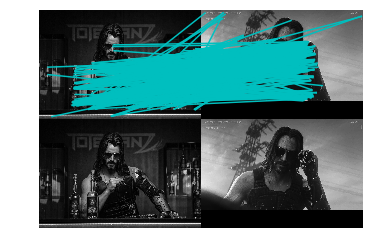

In [85]:
wid = 5

im1 = array(Image.open('./image/W2/cyberpunk.jpg').convert('L'))
im2 = array(Image.open('./image/W2/cyberpunk2.jpg').convert('L'))

harrisim = compute_harris_response(im1,5)
filtered_coords1 = get_harris_points(harrisim, wid + 1)
d1 = get_descriptors(im1, filtered_coords1, wid)

harrisim = compute_harris_response(im2, 5)
filtered_coords2 = get_harris_points(harrisim, wid + 1)
d2 = get_descriptors(im2, filtered_coords2, wid)

print 'starting matching'
matches = match_twosided(d1,d2)

figure()
gray()
plot_matches(im1, im2, filtered_coords1, filtered_coords2, matches)
show()

#不得不说这个Harris匹配对应点太差劲了。。脸一点儿也没匹配上，大概是灰度太高了？
#另外可能因为图很大，处理时间挺长的

processed tmp.pgm to image/W2/cyberpunk1024.sift


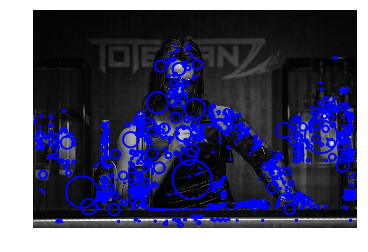

In [9]:
#假装是sift.py
from PIL import Image
from numpy import *
from pylab import *
import os

def process_image(imagename, resultname, params = "--edge-thresh 10 --peak-thresh 5"):
#处理一幅图像，然后将结果保存在文件中

    if imagename[-3:] != 'pgm':
        # 创建一个pgm 文件
        im = Image.open(imagename).convert('L') #这里的imagename对应于函数输入，不必修改路径
        im.save('tmp.pgm')
        imagename = 'tmp.pgm'
    
    cmmd = str("sift " + imagename + " --output=" + resultname + " " + params)
    os.system(cmmd)
    print 'processed', imagename, 'to', resultname
    
def read_features_from_file(filename):
#读取特征属性值，然后将其以矩阵的形式返回
    f = loadtxt(filename)
    return f[:,:4], f[:,4:] # 特征位置，描述子 同样是左闭右开哦

def write_features_to_file(filename, locs, desc):
#将特征位置和描述子保存到文件中
    savetxt(filename, hstack((locs, desc))) #hstack函数可以拼接不同的行向量来水平堆叠

def plot_features(im,locs,circle = False):
#显示带有特征的图像
#输入：im（数组图像），locs（每个特征的行、列、尺度和朝向）

    def draw_circle(c,r):
        t = arange(0, 1.01, .01) * 2 * pi
        x = r * cos(t) + c[0]
        y = r * sin(t) + c[1]
        plot(x, y, 'b', linewidth = 2)
        
        imshow(im)
    if circle:
        for p in locs:
            draw_circle(p[:2],p[2])
    else:
        plot(locs[:, 0], locs[:, 1], 'ob')
    axis('off')

imname = 'image/W2/cyberpunk1024.jpg'
im1 = array(Image.open(imname).convert('L'))
process_image(imname, 'image/W2/cyberpunk1024.sift')
l1, d1 = read_features_from_file('image/W2/cyberpunk1024.sift')
figure()
gray()
plot_features(im1,l1,circle = True)
show()

#如果不压缩图片质量的话，内存会爆掉。。

In [11]:
def match(desc1,desc2):
#对于第一幅图像中的每个描述子，选取其在第二幅图像中的匹配
#输入：desc1（第一幅图像中的描述子），desc2（第二幅图像中的描述子）

    desc1 = array([d / linalg.norm(d) for d in desc1])
    desc2 = array([d / linalg.norm(d) for d in desc2])
    
    dist_ratio = 0.6
    desc1_size = desc1.shape
    
    matchscores = zeros((desc1_size[0], 1), 'int')
    desc2t = desc2.T # 预先计算矩阵转置
    
    for i in range(desc1_size[0]):
        dotprods = dot(desc1[i,:],desc2t) # 向量点乘
        dotprods = 0.9999 * dotprods
        # 反余弦和反排序，返回第二幅图像中特征的索引
        indx = argsort(arccos(dotprods))
        
        # 检查最近邻的角度是否小于dist_ratio 乘以第二近邻的角度
        if arccos(dotprods)[indx[0]] < dist_ratio * arccos(dotprods)[indx[1]]:
            matchscores[i] = int(indx[0])
    
    return matchscores

def match_twosided(desc1,desc2):
#双向对称版本的match()
    matches_12 = match(desc1,desc2)
    matches_21 = match(desc2,desc1)
    ndx_12 = matches_12.nonzero()[0]
    # 去除不对称的匹配
    for n in ndx_12:
        if matches_21[int(matches_12[n])] != n:
            matches_12[n] = 0
    
    return matches_12

def appendimages(im1,im2):
#返回将两幅图像并排拼接成的一幅新图像#
    # 选取具有最少行数的图像，然后填充足够的空行
    rows1 = im1.shape[0]
    rows2 = im2.shape[0]
    if rows1 < rows2:
        im1 = concatenate((im1,zeros((rows2-rows1,im1.shape[1]))),axis=0)
    elif rows1 > rows2:
        im2 = concatenate((im2,zeros((rows1-rows2,im2.shape[1]))),axis=0)
    # 如果这些情况都没有，那么它们的行数相同，不需要进行填充
    return concatenate((im1,im2), axis=1)

def plot_matches(im1,im2,locs1,locs2,matchscores,show_below=True):
#显示一幅带有连接匹配之间连线的图片
#输入：im1，im2（数组图像），locs1，locs2（特征位置），matchscores（match()的输出），show_below（如果图像应该显示在匹配的下方）
    im3 = appendimages(im1,im2)
    if show_below:
        im3 = vstack((im3,im3))
    
    imshow(im3)
    
    cols1 = im1.shape[1]
    for i,m in enumerate(matchscores):
        if m>0:
            plot([locs1[i][1],locs2[m][1]+cols1],[locs1[i][0],locs2[m][0]],'c')
    axis('off')

processed tmp.pgm to image/W2/cyberpunk1024.sift
processed tmp.pgm to image/W2/cyberpunk21024.sift
starting matching


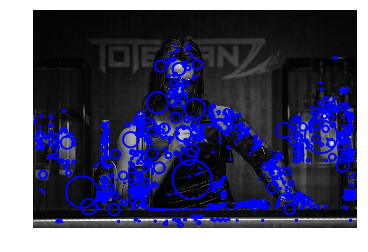

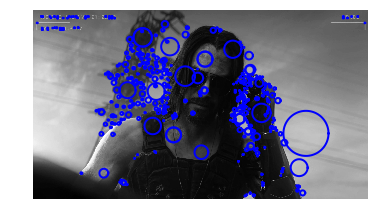

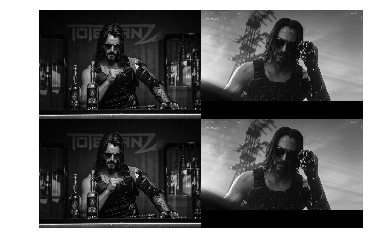

In [23]:
imname1 = 'image/W2/cyberpunk1024.jpg'
im1 = array(Image.open(imname1).convert('L'))
process_image(imname1, 'image/W2/cyberpunk1024.sift')
l1, d1 = read_features_from_file('image/W2/cyberpunk1024.sift')

imname2 = 'image/W2/cyberpunk21024.jpg'
im2 = array(Image.open(imname2).convert('L'))
process_image(imname2, 'image/W2/cyberpunk21024.sift')
l2, d2 = read_features_from_file('image/W2/cyberpunk21024.sift')

print 'starting matching'
matches = match_twosided(d1,d2)

figure()
gray()
plot_features(im1,l1,circle = True)
figure()
gray()
plot_features(im2,l2,circle = True)
figure()
plot_matches(im1, im2, l1, l2, matches) #这里有问题但没有debug出来 一直没法完成匹配
show()